Тестовое задание на должность аналитика

Описание данных


data.csv

- id: id транзакции

- timestamp: дата продажи (транзакции)

- full_sq: общая площадь

- life_sq: жилая площадь

- floor: этаж

- max_floor: количество этажей в здании

- material: материал, из которого изговолены стены

- build_year: год строительства

- num_room: количество жилых комнат

- kitch_sq: площадь кухни

- full_all: количество населения в регионе

- state: жилищные условия

- sub_area: название территории

- price_doc: цена квартиры (целевая переменная)

macro.csv

- timestamp : дата, на которую актуальны макроэкономические показатели

- salary : средняя зарплата в регионе

- fixed_basket: стоимость потребительской корзины

- rent_price_3room_eco: стоимость аренды 3-х комнатного жилья эконом-класса

- rent_price_2room_eco: стоимость аренды 2-х комнатного жилья эконом-класса

- rent_price_1room_eco: стоимость аренды 1-но комнатного жилья эконом-класса

- average_life_exp: средняя продолжительность жизни в регионе

Откроем все необходимые библиотеки для работы с данными

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
from plotly import graph_objects as go
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')
macro = pd.read_csv('gdrive/My Drive/macro.csv')
macro

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,timestamp,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
0,2010-01-01,38410.5,11443.63,NaN,NaN,NaN,74.2
1,2010-01-02,38410.5,11443.63,NaN,NaN,NaN,74.2
2,2010-01-03,38410.5,11443.63,NaN,NaN,NaN,74.2
3,2010-01-04,38410.5,11443.63,NaN,NaN,NaN,74.2
4,2010-01-05,38410.5,11443.63,NaN,NaN,NaN,74.2
...,...,...,...,...,...,...,...
2479,2016-10-15,NaN,20354.78,45.71,38.4,29.78,NaN
2480,2016-10-16,NaN,20354.78,45.71,38.4,29.78,NaN
2481,2016-10-17,NaN,20354.78,45.71,38.4,29.78,NaN
2482,2016-10-18,NaN,20354.78,45.71,38.4,29.78,NaN


Откроем три оставшиеся таблицы

In [ ]:
test = pd.read_csv('gdrive/My Drive/test.csv')
test

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area
0,1417,2012-03-03,51,31.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,221709,Krjukovo
1,9725,2013-08-08,44,29.0,5.0,3.0,9.0,1.0,1969.0,2.0,5.0,37502,Sviblovo
2,30369,2015-06-23,32,18.0,1.0,3.0,9.0,1.0,1970.0,1.0,6.0,125354,Chertanovo Severnoe
3,20522,2014-07-02,51,30.0,11.0,1.0,17.0,1.0,2003.0,2.0,9.0,130229,Moskvorech'e-Saburovo
4,12891,2013-12-07,44,28.0,4.0,2.0,5.0,1.0,1965.0,2.0,5.0,145576,Caricyno
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3769,10843,2013-09-30,53,28.0,9.0,3.0,16.0,5.0,1976.0,2.0,11.0,1318695,Vyhino-Zhulebino
3770,543,2011-12-06,31,17.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,85083,Sokolinaja Gora
3771,25332,2014-11-26,38,19.0,8.0,3.0,16.0,1.0,1977.0,1.0,10.0,111023,Ochakovo-Matveevskoe
3772,25329,2014-11-26,120,57.0,7.0,3.0,10.0,2.0,1985.0,3.0,11.0,47245,Meshhanskoe


In [ ]:
submission = pd.read_csv('gdrive/My Drive/submission.csv')
submission

,id,price_doc
0,0,10000
1,1,10000
2,2,10000
3,3,10000
4,4,10000
...,...,...
3769,3769,10000
3770,3770,10000
3771,3771,10000
3772,3772,10000


In [ ]:
train = pd.read_csv('gdrive/My Drive/train.csv')
train

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc
0,13324,2013-12-23,42,28.0,8.0,2.0,9.0,1.0,1969.0,2.0,6.0,43795,Pechatniki,7100000
1,10064,2013-08-26,55,41.0,4.0,3.0,5.0,2.0,1960.0,3.0,5.0,21040,Dorogomilovo,11500000
2,12022,2013-11-11,43,29.0,4.0,2.0,5.0,2.0,1960.0,2.0,5.0,157010,Ivanovskoe,5800000
3,10186,2013-08-30,62,35.0,15.0,NaN,22.0,1.0,1985.0,2.0,10.0,178264,Jasenevo,11400000
4,30052,2015-05-29,80,55.0,15.0,1.0,24.0,6.0,2017.0,3.0,12.0,76284,Nagatinskij Zaton,12697154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15087,23382,2014-10-08,69,48.0,2.0,2.0,4.0,2.0,1950.0,3.0,7.0,101982,Tekstil'shhiki,9100000
15088,24264,2014-10-31,78,75.0,4.0,1.0,17.0,1.0,2014.0,3.0,1.0,247469,Nekrasovka,7722400
15089,16165,2014-03-18,38,19.0,15.0,3.0,17.0,1.0,1990.0,1.0,8.0,101708,Juzhnoportovoe,7000000
15090,10635,2013-09-20,54,32.0,11.0,3.0,16.0,1.0,1979.0,2.0,9.0,178264,Jasenevo,7000000


В нашем случае, таблицы test, train и submission имеют один связующий параметр - столбец id. Попробуем составить таблицу по типу "добавление", - функция append. Затем рассмотрим, есть ли дубликаты в объединенной таблице. Назовем таблицу data (согласно заданию).

In [ ]:
data_1 = test.append(train)
data_1

<ipython-input-5-8f3fa65fa2cd>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_1 = test.append(train)


,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc
0,1417,2012-03-03,51,31.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,221709,Krjukovo,NaN
1,9725,2013-08-08,44,29.0,5.0,3.0,9.0,1.0,1969.0,2.0,5.0,37502,Sviblovo,NaN
2,30369,2015-06-23,32,18.0,1.0,3.0,9.0,1.0,1970.0,1.0,6.0,125354,Chertanovo Severnoe,NaN
3,20522,2014-07-02,51,30.0,11.0,1.0,17.0,1.0,2003.0,2.0,9.0,130229,Moskvorech'e-Saburovo,NaN
4,12891,2013-12-07,44,28.0,4.0,2.0,5.0,1.0,1965.0,2.0,5.0,145576,Caricyno,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15087,23382,2014-10-08,69,48.0,2.0,2.0,4.0,2.0,1950.0,3.0,7.0,101982,Tekstil'shhiki,9100000.0
15088,24264,2014-10-31,78,75.0,4.0,1.0,17.0,1.0,2014.0,3.0,1.0,247469,Nekrasovka,7722400.0
15089,16165,2014-03-18,38,19.0,15.0,3.0,17.0,1.0,1990.0,1.0,8.0,101708,Juzhnoportovoe,7000000.0
15090,10635,2013-09-20,54,32.0,11.0,3.0,16.0,1.0,1979.0,2.0,9.0,178264,Jasenevo,7000000.0


In [ ]:
data = data_1.append(submission)
data

<ipython-input-6-d1f4c28c80be>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data_1.append(submission)


,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc
0,1417,2012-03-03,51.0,31.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,221709.0,Krjukovo,NaN
1,9725,2013-08-08,44.0,29.0,5.0,3.0,9.0,1.0,1969.0,2.0,5.0,37502.0,Sviblovo,NaN
2,30369,2015-06-23,32.0,18.0,1.0,3.0,9.0,1.0,1970.0,1.0,6.0,125354.0,Chertanovo Severnoe,NaN
3,20522,2014-07-02,51.0,30.0,11.0,1.0,17.0,1.0,2003.0,2.0,9.0,130229.0,Moskvorech'e-Saburovo,NaN
4,12891,2013-12-07,44.0,28.0,4.0,2.0,5.0,1.0,1965.0,2.0,5.0,145576.0,Caricyno,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3769,3769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.0
3770,3770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.0
3771,3771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.0
3772,3772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.0


Посмотрим, сколько пропусков имеет конечная таблица data.

In [ ]:
data.isna().sum()

id               0
timestamp     3774
full_sq       3774
life_sq       5349
floor         3802
state         7135
max_floor     5195
material      5195
build_year    5774
num_room      5195
kitch_sq      5195
full_all      3774
sub_area      3774
price_doc     3774
dtype: int64

Кроме столбца id количество пропусков в таблице превышает 10%. Это означает, что пропуски нужно заполнить значениями, максимально отражающие весь набор данных (генеральной совокупности). Например, это может быть медиана или 0, в зависимости от характера данных. 

In [ ]:
data.describe()

,id,full_sq,life_sq,floor,state,max_floor,material,num_room,kitch_sq,full_all,price_doc
count,22640.000000,18866.000000,17291.000000,18838.000000,15505.000000,17445.000000,17445.000000,17445.000000,17445.000000,1.886600e+04,1.886600e+04
mean,15980.409143,53.940899,34.259152,7.293715,2.201290,12.423330,1.890112,1.934824,7.206420,1.597157e+05,6.053413e+06
std,9040.714275,44.116185,59.944591,5.191169,0.852846,6.279832,1.506052,0.864166,26.981615,3.043511e+05,5.386462e+06
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.546000e+03,1.000000e+04
25%,10050.500000,38.000000,20.000000,3.000000,2.000000,9.000000,1.000000,1.000000,5.000000,4.843900e+04,2.000000e+06
50%,16819.500000,49.000000,30.000000,6.000000,2.000000,12.000000,1.000000,2.000000,7.000000,8.771300e+04,5.998735e+06
75%,23568.250000,63.000000,43.000000,10.000000,3.000000,17.000000,2.000000,3.000000,9.000000,1.253540e+05,8.150000e+06
max,30473.000000,5326.000000,7478.000000,77.000000,33.000000,57.000000,6.000000,19.000000,2014.000000,1.716730e+06,9.512250e+07


Есть ли дубликаты?

In [ ]:
data.duplicated().sum()

0

Явных дубликатов нет

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22640 entries, 0 to 3773
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          22640 non-null  int64  
 1   timestamp   18866 non-null  object 
 2   full_sq     18866 non-null  float64
 3   life_sq     17291 non-null  float64
 4   floor       18838 non-null  float64
 5   state       15505 non-null  float64
 6   max_floor   17445 non-null  float64
 7   material    17445 non-null  float64
 8   build_year  16866 non-null  object 
 9   num_room    17445 non-null  float64
 10  kitch_sq    17445 non-null  float64
 11  full_all    18866 non-null  float64
 12  sub_area    18866 non-null  object 
 13  price_doc   18866 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 2.6+ MB


Переведем столбцы в нужный вид: timestamp в datetime, а build_year во float

In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['build_year'] = data['build_year'].replace('o', '0') # вероятнее всего, о - это ноль, заменим на 0
data['build_year'] = data['build_year'].astype(float)

Реальный год постройки навряд ли может быть ранее, чем начало 20 века (возможно, некоторые сооружения действительно имеют более древнюю постройку, однако чаще всего это памятники архитектуры и нежилые помещения (музеи, храмы, театры и тд).

In [ ]:
data = data.query("full_sq <= 100")
data = data.query("1950 <= build_year <= 2022")

Из таблицы describe мы можем заметить, что данные по нескольким столбцам в некотором проценте отсутствуют. Что это за данные? Это числовые данные по зарплате и средней цены аренды. Изучив данные, можно прийти к выводу, что пропуски разумнее заменить медианой.

In [ ]:
macro['salary'] = macro['salary'].transform(lambda x: x.fillna(x.median()))
macro['rent_price_3room_eco'] = macro['rent_price_3room_eco'].transform(lambda x: x.fillna(x.median()))
macro['rent_price_2room_eco'] = macro['rent_price_2room_eco'].transform(lambda x: x.fillna(x.median()))
macro['rent_price_1room_eco'] = macro['rent_price_1room_eco'].transform(lambda x: x.fillna(x.median()))
macro['average_life_exp'] = macro['average_life_exp'].transform(lambda x: x.fillna(x.median()))

В столбцах rent_price_2room_eco	rent_price_1room_eco удалим значения, явно выбивающиеся из общей тенденции.

In [ ]:
macro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   timestamp             2484 non-null   object 
 1   salary                2484 non-null   float64
 2   fixed_basket          2484 non-null   float64
 3   rent_price_3room_eco  2484 non-null   float64
 4   rent_price_2room_eco  2484 non-null   float64
 5   rent_price_1room_eco  2484 non-null   float64
 6   average_life_exp      2484 non-null   float64
dtypes: float64(6), object(1)
memory usage: 136.0+ KB


Исходя из характера данных и значений, заменим медианой пропуски в столбцах таблицы data, кроме id (там нет пропусков)

In [ ]:
data['full_sq'] = data['full_sq'].transform(lambda x: x.fillna(x.median()))
data['life_sq'] = data['life_sq'].transform(lambda x: x.fillna(x.median()))
data['state'] = data['state'].transform(lambda x: x.fillna(x.median()))
data['floor'] = data['floor'].transform(lambda x: x.fillna(x.median()))
data['max_floor'] = data['max_floor'].transform(lambda x: x.fillna(x.median()))
data['build_year'] = data['build_year'].transform(lambda x: x.fillna(x.median()))
data['num_room'] = data['num_room'].transform(lambda x: x.fillna(x.median()))
data['kitch_sq'] = data['kitch_sq'].transform(lambda x: x.fillna(x.median()))
data['full_all'] = data['full_all'].transform(lambda x: x.fillna(x.median()))
data['price_doc'] = data['price_doc'].transform(lambda x: x.fillna(x.median()))

Проверим, какие значения столбцов full_sq, life_sq, floor, max_floor входят в генеральную совокупность. Для того, чтобы наш датасет не очистился более чем на 10% всех строк, возьмем 99-й перцентиль и "отрежем" заходящие за данный интервал данные (выбросы).

In [ ]:
data['life_sq'] = data['life_sq'].astype(int)

In [ ]:
np.percentile(data['full_sq'], 99)

95.0

In [ ]:
np.percentile(data['life_sq'], 99)

79.0

In [ ]:
np.percentile(data['floor'], 99)

22.0

In [ ]:
np.percentile(data['max_floor'], 99)

25.0

In [ ]:
data = data.query("max_floor <= 25")

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc
1,9725,2013-08-08,44.0,29,5.0,3.0,9.0,1.0,1969.0,2.0,5.0,37502.0,Sviblovo,6720000.0
2,30369,2015-06-23,32.0,18,1.0,3.0,9.0,1.0,1970.0,1.0,6.0,125354.0,Chertanovo Severnoe,6720000.0
3,20522,2014-07-02,51.0,30,11.0,1.0,17.0,1.0,2003.0,2.0,9.0,130229.0,Moskvorech'e-Saburovo,6720000.0
4,12891,2013-12-07,44.0,28,4.0,2.0,5.0,1.0,1965.0,2.0,5.0,145576.0,Caricyno,6720000.0
5,24065,2014-10-28,31.0,21,1.0,3.0,9.0,5.0,1966.0,1.0,5.0,105663.0,Juzhnoe Tushino,6720000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15086,17247,2014-04-10,72.0,42,19.0,3.0,21.0,1.0,1991.0,3.0,8.0,43795.0,Pechatniki,10700000.0
15087,23382,2014-10-08,69.0,48,2.0,2.0,4.0,2.0,1950.0,3.0,7.0,101982.0,Tekstil'shhiki,9100000.0
15088,24264,2014-10-31,78.0,75,4.0,1.0,17.0,1.0,2014.0,3.0,1.0,247469.0,Nekrasovka,7722400.0
15089,16165,2014-03-18,38.0,19,15.0,3.0,17.0,1.0,1990.0,1.0,8.0,101708.0,Juzhnoportovoe,7000000.0


In [ ]:
data = data.query("life_sq <= 79")

In [ ]:
data = data.query("full_sq <= 95")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14959 entries, 1 to 15090
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          14959 non-null  int64         
 1   timestamp   14959 non-null  datetime64[ns]
 2   full_sq     14959 non-null  float64       
 3   life_sq     14959 non-null  int64         
 4   floor       14959 non-null  float64       
 5   state       14959 non-null  float64       
 6   max_floor   14959 non-null  float64       
 7   material    14959 non-null  float64       
 8   build_year  14959 non-null  float64       
 9   num_room    14959 non-null  float64       
 10  kitch_sq    14959 non-null  float64       
 11  full_all    14959 non-null  float64       
 12  sub_area    14959 non-null  object        
 13  price_doc   14959 non-null  float64       
dtypes: datetime64[ns](1), float64(10), int64(2), object(1)
memory usage: 1.7+ MB


Проверим, совпадает ли количество уникальных id с количеством строк в таблице.

In [ ]:
data['id'].nunique()

14959

К сожалению, у нас удалилось почти 30% данных. Тем не менее, выборку в 15 тысяч строк можно считать репрезентативной.

# Проведем исследовательский анализ данных

Построим диаграмму по общей площади квартир

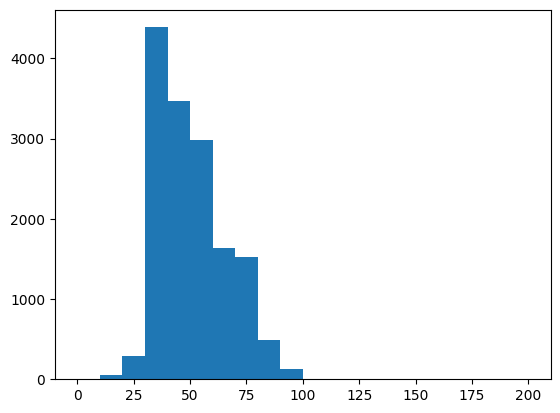

13657    95.0
1156     95.0
8424     95.0
7118     95.0
2891     95.0
11057    95.0
11303    95.0
1774     95.0
9726     95.0
1523     95.0
Name: full_sq, dtype: float64


In [ ]:
plt.hist(data['full_sq'], bins=20, range=(0,200))
plt.show()
print(data['full_sq'].sort_values(ascending=False).head(10))

Больше всего квартир с площадью от 30 до 60 квадратных метров.

График зависимости количество квартир - жилая площадь

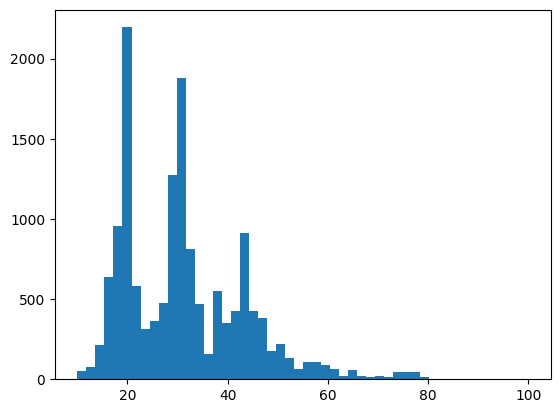

10863    79
874      79
3268     79
9166     79
2788     79
9207     79
1379     79
2426     79
1678     79
5476     79
Name: life_sq, dtype: int64


In [ ]:
plt.hist(data['life_sq'], bins=50, range=(10,100))
plt.show()
print(data['life_sq'].sort_values(ascending=False).head(10))

На графике видим несколько пиковых значений, - 20, 30 и 42 "квадрата", - вероятнее всего, множество жилых домов построены по определенным стандартам, поэтому жилые площади в них одинаковы. Больше всего квартир с жилой площадью 20 квадратных метров.

Средняя стоимость аренды 3-х комнатного жилья эконом-класса по дате

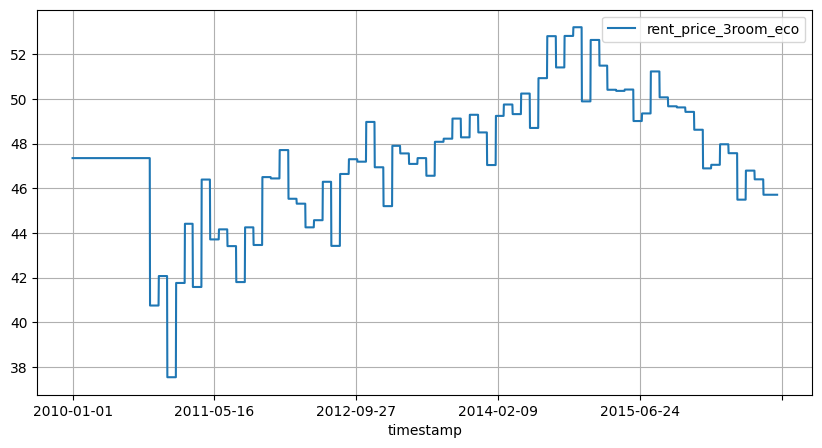

In [ ]:
macro.pivot_table(index='timestamp', values='rent_price_3room_eco').plot(grid=True, style='-', figsize=(10, 5))
plt.show()

Средняя стоимость аренды 2-х комнатного жилья эконом-класса по дате

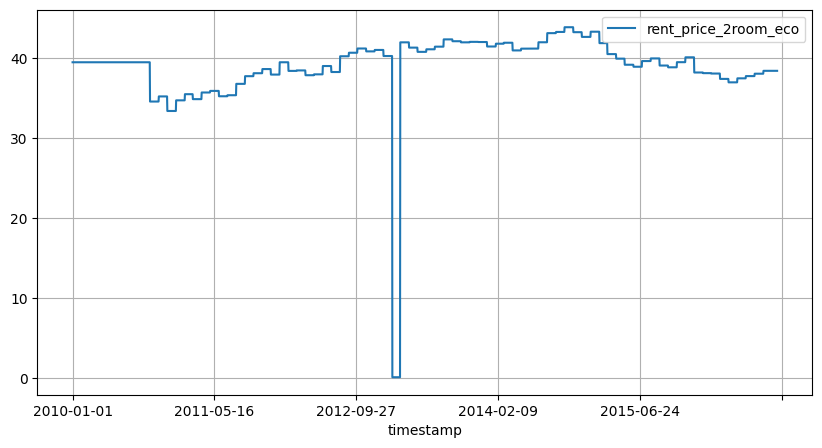

In [ ]:
macro.pivot_table(index='timestamp', values='rent_price_2room_eco').plot(grid=True, style='-', figsize=(10, 5))
plt.show()

Средняя стоимость аренды 1 комнатного жилья эконом-класса по дате

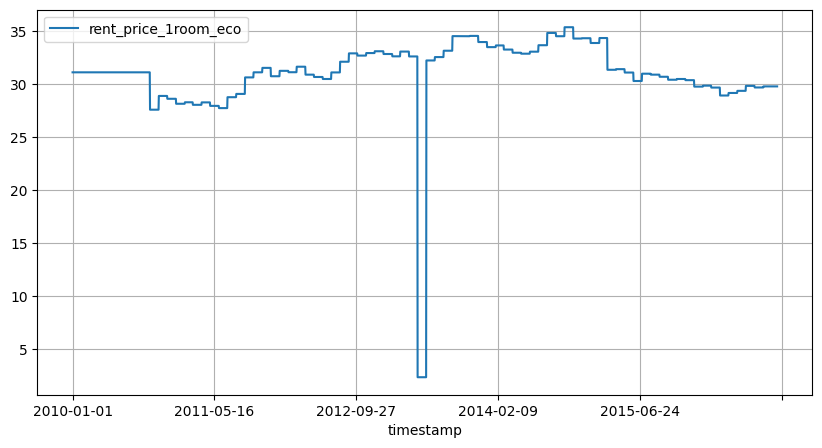

In [ ]:
macro.pivot_table(index='timestamp', values='rent_price_1room_eco').plot(grid=True, style='-', figsize=(10, 5))
plt.show()

Как видим, средняя стоимость аренды жилья всех типов постепенно росла до апреля-мая 2014 года. Среднее увеличение стоимости аренды составило в районе 10 пунктов (?) - в чем указаны цены? 

Теперь посмотрим, какими темпами продавались квартиры в домах, построенных в разное время

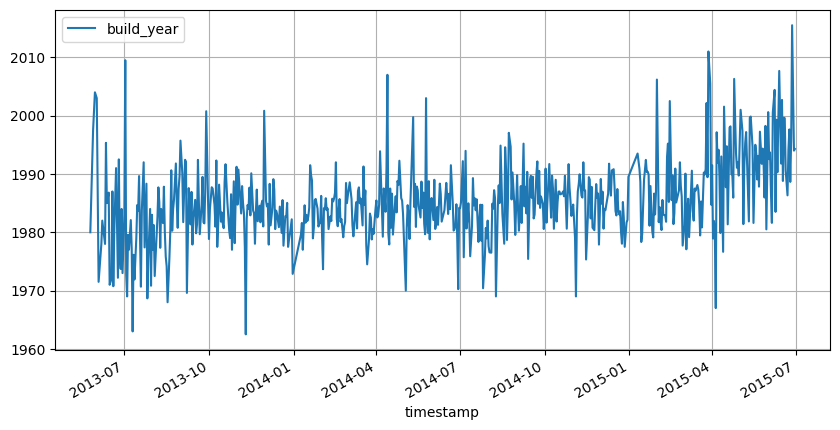

In [ ]:
data.pivot_table(index='timestamp', values='build_year').plot(grid=True, style='-', figsize=(10, 5))
plt.show()

Как видим из графика, покупка жилья до апреля 2015 года в среднем осуществлялась по домам 80-х годов постройки, а дальше - 90-х. Скорее всего, в этот период был бум нового строительства.

Изучим, как менялась средняя зарплата в регионе, и сопоставим это с предыдущими графиками.

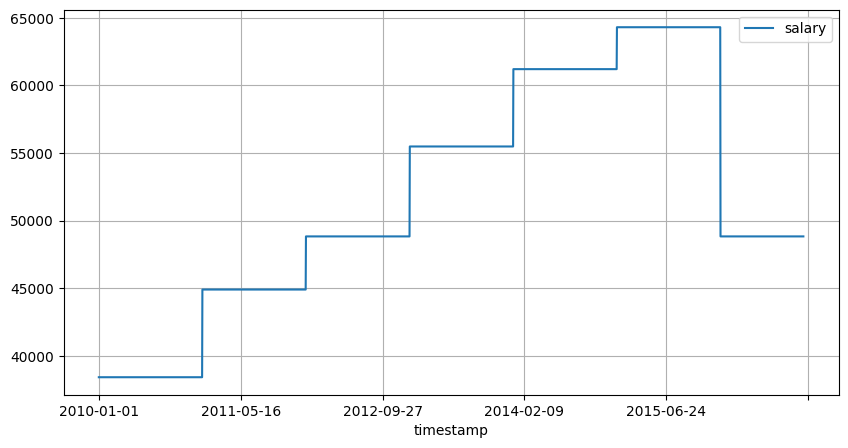

In [ ]:
macro.pivot_table(index='timestamp', values='salary').plot(grid=True, style='-', figsize=(10, 5))
plt.show()

Средняя зарплата менялась от 39000 рублей в 2010 году до почти 65 тысяч к началу 2014 года. В середине 2014 года средняя зарплата сильно упала, до уровня 2012 года и стала около 49000 рублей. Влияние западных санкций и кризиса.

# Общий вывод. 
Мы объединили таблицы test, train и submission по общему признаку - столбец id. Далее, уже в объединенной таблице и таблице macro произвели предобработку данных, - проверили на дубликаты, пропуски, корректность заполнения, заполнили пропуски и перевели в необходимый тип данных. Далее были построены графики зависимостей, где были найдены необходимые величины и закономерности. Так, вышло, что квартиры с площадью от 30 до 50 квадратных метров очень распространены, что неудивительно, - мало квартир где комнат больше 3, да и элитных домов не так много, даже в крупных городах. На следующем графике отчетливо замечаем некое "разделение" домов по признакам, - в разное время были бумы строительства, строили в основном однотипные дома, поэтому на графике три пика, - значит три пика строительства домов было за последние 60-70 лет. Далее построены графики по средней цене аренды по времени. Тут тоже закономерность - при растущей инфляции, растет и арендная плата. Однако в середине 2014 года аренда снизилась, - скорее всего из-за кризиса и общего падения уровня жизни арендодателям пришлось "пойти на уступки" клиентам и снизили цены. После апреля 2015 года покупатели почему то переориентировались на жилье 90-х годов постройки. И наконец, с середины 2015 года наблюдается падение доходов населения. Можно ли это связать с активизацией покупок жилья постройки 90-х годов, сказать сложно, но такая закономерность есть.